In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

#클러스터링 위한 패키지
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #미리 스케일링 선언함
 
#엘보우 메소드 정의
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(1, 10):
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

    plt.plot(range(1, 10), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()

#실루엣 스코어 정의
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

In [22]:
seoul_data = pd.read_csv('./data/seoul_data50.csv',encoding='UTF8')

In [23]:
dong = seoul_data.iloc[:,[0]] #cluster labeling 후 행정동 붙여서 비교하기 위해 dong으로 빼둠
#clustering 시 필요없는 변수 삭제
seoul_data = seoul_data.drop('인구 (명)', axis = 1)
seoul_data = seoul_data.drop('면적 (㎢)', axis = 1)
seoul_data = seoul_data.drop('구', axis = 1)
seoul_data = seoul_data.drop('행정동명', axis = 1)
seoul_data = seoul_data.drop('행정동_코드', axis = 1)
seoul_data = seoul_data.drop('총반납대여', axis = 1)

In [24]:
#문자 타입 숫자로 변환
seoul_data = pd.get_dummies(seoul_data, columns = ['강']) 

#문자 타입 숫자로 변환(하천 존재할 시 1, 존재하지 않을 시 0)
seoul_data['하천'] = seoul_data['하천'].fillna(0).map(lambda x: 1 if x != 0 else x)
seoul_data = seoul_data.fillna(0)

In [25]:
seoul_data.head(10) #데이터 형태 확인

,시설물개수,인구밀도 (명/㎢),하천,자동차등록대수,자전거도로(km),지하철_총승객수,버스_총승객수,학교개수,영화관개수,대학교개수,강_한강
0,20,7310,0,9477.400000,3.855000,522372.0,711582,2.0,1.0,0.0,0
1,20,3919,0,7557.388889,3.511111,7984912.0,2788411,5.0,1.0,0.0,1
2,32,12325,0,9477.400000,3.855000,1919704.0,744341,17.0,0.0,0.0,0
3,8,23937,0,7557.388889,3.511111,4249030.0,1017536,7.0,0.0,0.0,1
4,29,3702,0,2607.352941,1.888235,11550312.0,3700523,2.0,4.0,5.0,0
5,19,3671,0,7102.937500,4.212500,4981827.0,1616294,2.0,1.0,0.0,1
6,9,2845,0,9477.400000,3.855000,1073562.0,451834,6.0,0.0,0.0,0
7,28,24175,0,7557.388889,3.511111,575286.0,2147150,2.0,1.0,1.0,0
8,17,5990,0,8714.740741,3.611111,766020.0,852829,3.0,1.0,0.0,1
9,15,21657,1,7935.166667,3.138889,944886.0,1182139,1.0,2.0,0.0,0


In [26]:
array_seoul_data = seoul_data.to_numpy() #array꼴로 바꿈
data_scaled = scaler.fit_transform(array_seoul_data) #스케일링

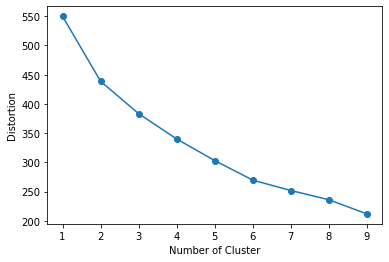

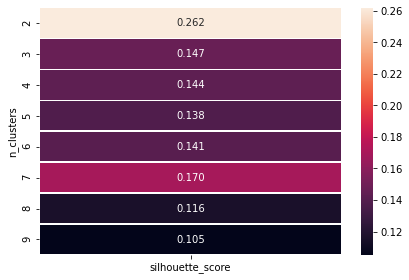

In [27]:
visualize_elbowmethod(data_scaled)
visualize_silhouette_layer(data_scaled)

In [28]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_scaled)

KMeans(n_clusters=6)

In [29]:
print(scaler.inverse_transform(kmeans.cluster_centers_))

[[ 1.94000000e+01  7.06460000e+03 -5.55111512e-17  5.97196278e+03
   3.09213889e+00  7.42859780e+06  2.09878040e+06  2.80000000e+00
   1.40000000e+00 -2.77555756e-17  6.00000000e-01]
 [ 1.33846154e+01  1.79046923e+04  9.23076923e-01  7.25139721e+03
   2.56566679e+00  1.32362369e+06  8.03522308e+05  3.53846154e+00
   8.46153846e-01  7.69230769e-02  5.55111512e-17]
 [ 1.10000000e+01  2.99074545e+04  5.55111512e-17  7.95767273e+03
   2.99476010e+00  1.83971182e+06  6.56419273e+05  2.72727273e+00
   3.63636364e-01  9.09090909e-02  5.55111512e-17]
 [ 1.65833333e+01  1.50060000e+04  5.55111512e-17  8.45685922e+03
   3.58712467e+00  9.19403083e+05  9.09306000e+05  7.83333333e+00
   2.50000000e-01  8.33333333e-02  8.32667268e-17]
 [ 2.90000000e+01  3.70200000e+03  0.00000000e+00  2.60735294e+03
   1.88823529e+00  1.15503120e+07  3.70052300e+06  2.00000000e+00
   4.00000000e+00  5.00000000e+00  0.00000000e+00]
 [ 8.87500000e+00  1.67596250e+04  3.75000000e-01  7.41708914e+03
   3.43069649e+00  

In [30]:
assignments_seoul_scaled = kmeans.labels_
print(assignments_seoul_scaled)

[3 0 3 5 4 0 3 3 5 1 3 3 0 2 1 2 2 2 1 1 1 3 2 2 1 2 1 3 5 2 5 0 3 2 1 5 5
 0 1 5 1 1 1 3 3 2 5 2 3 1]


In [31]:
seoul_data["cluster"]=assignments_seoul_scaled
seoul_data["행정동명"]= dong

In [32]:
seoul_data

,시설물개수,인구밀도 (명/㎢),하천,자동차등록대수,자전거도로(km),지하철_총승객수,버스_총승객수,학교개수,영화관개수,대학교개수,강_한강,cluster,행정동명
0,20,7310,0,9477.400000,3.855000,522372.0,711582,2.0,1.0,0.0,0,3,가양1동
1,20,3919,0,7557.388889,3.511111,7984912.0,2788411,5.0,1.0,0.0,1,0,여의동
2,32,12325,0,9477.400000,3.855000,1919704.0,744341,17.0,0.0,0.0,0,3,발산1동
3,8,23937,0,7557.388889,3.511111,4249030.0,1017536,7.0,0.0,0.0,1,5,당산2동
4,29,3702,0,2607.352941,1.888235,11550312.0,3700523,2.0,4.0,5.0,0,4,종로1.2.3.4가동
5,19,3671,0,7102.937500,4.212500,4981827.0,1616294,2.0,1.0,0.0,1,0,상암동
6,9,2845,0,9477.400000,3.855000,1073562.0,451834,6.0,0.0,0.0,0,3,공항동
7,28,24175,0,7557.388889,3.511111,575286.0,2147150,2.0,1.0,1.0,0,3,영등포동
8,17,5990,0,8714.740741,3.611111,766020.0,852829,3.0,1.0,0.0,1,5,잠실6동
9,15,21657,1,7935.166667,3.138889,944886.0,1182139,1.0,2.0,0.0,0,1,목1동


In [34]:
seoul_data.to_csv('./cluster_result/seoul_cluster50_2.csv',index=False)